### Lesson 3 key concepts

> :clock10: 20 min

- Working with branches
- Resolving merge conflicts
- Adding large files on GitHub
- Initializing directories on personal computer as GitHub repos



```shell
$ git branch 	                        # shows the current branches in the repo
$ git branch -a 	                    # shows all branches (even the ones you haven't worked on)
$ git checkout -b <NameOfNewBranch>	  # creates new branch
$ git checkout <BranchName> 	        # switches to the branch we want to work on
$ git pull 	                          # pulls the latest changes to the branch we are working on (git pull = git fetch + git merge)
$ git fetch 	                        # gets all branches from the repository
```

#### Merging Branches

Case 1: Merges changes in branch to the master file

```shell
$ git checkout master
$ git merge <Name of Branch to be merged to Master>
```

Case 2: Merges changes in master file to the branch

```shell
$ git checkout <branch name>
$ git merge master
```

### :pencil2: Practice on key concepts - Lab

> :clock10: 30 min

# Lab | Customer Analysis Final Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab_final` folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)

- Data Description.
- Goal.

### 02 - Getting Data

- Read the `.csv` file.

### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

### 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

### 05 - Modeling

- Apply model.

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

### 07 - Reporting

- Present results.

# Solution to Lab: Custumer Analysis Final Round

<font color='magenta'>
Please comment before each cell of code using a markdown cell. You should clearly state with your own words what the portion of code in the cell bellow does or add other insightful comments on that operation. Use the html tags in this cell to add your comments in a striking color for an easy review.
</font>


### 01 - Problem (case study)

Data Description.

- **customer:** Customer ID
- **state:** US State
- **customer_lifetime_value:** CLV is the client economic value for a company during all their relationship
- **response:** Response to marketing calls (customer engagement)
- **coverage:** Customer coverage type
- **education:** Customer education level
- **effective_to_date:** Effective to date
- **employmentstatus:** Customer employment status
- **gender:** Customer gender
- **income:** Customer income
- **location_code:** Customer living zone
- **marital_status:** Customer marital status
- **monthly_premium_auto:** Monthly premium
- **months_since_last_claim:** Last customer claim
- **months_since_policy_inception:** Policy Inception
- **number_of_open_complaints:** Open claims
- **number_of_policies:** Number policies
- **policy_type:** Policy type
- **policy:** Policy
- **renew_offer_type:** Renew
- **sales_channel:** Sales channel (customer-company first contact)
- **total_claim_amount:** Claims amount
- **vehicle_class:** Vehicle class
- **vehicle_size:** Vehicle size
- **vehicle_type:** Vehicle type

**Goal.**  
Can we predict the amount claimed by a client?

### 02 - Getting Data

- Read `.csv` file

<font color='magenta'>
# we gonna install the pandas library and then we order to display our dataset with all the columns
</font>

In [98]:
import pandas as pd
import numpy as np
# panel data, handling dataframes
pd.set_option('display.max_columns', None)

In [99]:
# we are reading the csv file from the folder csv_files and naming it data, then display the dataset with the first 5 columns

In [100]:
data=pd.read_csv('./files_for_lab_final/csv_files/marketing_customer_analysis.csv')    # import csv file
data.head()                                                    # show first 5 rows

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

### 03 - Cleaning/Wrangling/EDA

- Change headers names.

In [101]:
# with this we want to know the number of rows and columns
data.shape       # dataframe dimensions

(9134, 24)

In [102]:
# this are the names of the 24 columns of our dataset
data.columns     # columns headers

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [103]:
# we are standarizing the header names by lowering letters and replacing spaces by _
data.columns=[e.lower().replace(' ', '_') for e in data.columns]   # lower and replace
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

- Deal with NaN values.

In [104]:
# here we are checking which columns are numerical and categorical
data.info(memory_usage='deep')   # dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [105]:
# we seing the total number of Nans in each column
data.isna().sum()     # missing values

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [106]:
# we delete the categorical columns customer and "vehicle class" and "customer" because they are categoricals so unique that they are not useful for the model  
data = data.drop(columns=['vehicle_class', 'customer'])   # drop useless columns (no info or nan)

In [107]:
# we are deleting the rows that contain any nan value in a category
data=data.dropna()   # drop rows with nan values

In [108]:
# here counts the diferent (unique) values of each column
for c in data.columns.tolist():         # know the unique values for each column
    print(c, len(data[c].unique()))

state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employmentstatus 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
total_claim_amount 5106
vehicle_size 3


In [109]:
# as we can see the main difference from before are the 2 colums deleated
data.shape

(9134, 22)

- Datetime Features.

**Effective To Date**

In [110]:
#esta cambiando a formato fecha la columna effective to data 

In [111]:
print(f"Original dtype: {data['effective_to_date'].dtype}\n")   # object
data['effective_to_date']=pd.to_datetime(data['effective_to_date'])   # datetime
print(f"Meantime dtype: {data['effective_to_date'].dtype}")

Original dtype: object

Meantime dtype: datetime64[ns]


In [112]:
# mirando la fecha minima y maxima

In [113]:
print('--')
print(f"Min date: {data['effective_to_date'].min()}")         # from January 1st..
print(f"Max date: {data['effective_to_date'].max()}")         # to February 28th
print('--')

--
Min date: 2011-01-01 00:00:00
Max date: 2011-02-28 00:00:00
--


In [114]:
# como el model no entiende el formato fecha, lo pasamos a un numero (segundos)

In [115]:
data['effective_to_date']=data['effective_to_date'].apply(lambda x: x.toordinal())   # you can change the type to ordinal.

print(f"New dtype: {data['effective_to_date'].dtype}")

New dtype: int64


In [116]:
# Or alternatively use Unix time
# data['effective_to_date']  = (data['effective_to_date']  - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

- Categorical Features.

**Values for each class in categorical features**

In [117]:
# estamos creando una lista que incluye las columnas categoricas del dataset
cat_cols=[col for col in data.columns if (data[col].dtype==object)]     # categorical columns

In [118]:
# un bucle que nos muestra para las 13 categoricas el nombre de la columna, el tipo (object), los valores unicos,
# el nombre de estas filas unicas, el porcentage que tiene cad una sobre el totl de la columna, 
print('Categorical Features:', len(cat_cols))
print('----------')
for c in cat_cols:
    print(f'Name: {data[c].name}')    # column name
    print(f'Type: {data[c].dtype}')   # column type
    print(f'Unique values: {len(data[c].unique())}')   # column unique values
    print(data[c].unique())
    print(((data[c].value_counts()/ sum(data[c].value_counts()))*100))   # percentage
    print('\n----------')

Categorical Features: 13
----------
Name: state
Type: object
Unique values: 5
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64

----------
Name: response
Type: object
Unique values: 2
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: response, dtype: float64

----------
Name: coverage
Type: object
Unique values: 3
['Basic' 'Extended' 'Premium']
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64

----------
Name: education
Type: object
Unique values: 5
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64

----------
Name: employmentstatus
Type: object
Unique values: 5
['Employe

- Numerical Features.

In [119]:
# de las numericas nos dan estadisticas para entender mejor el dataset

In [120]:
data.describe()     # stats

customer_lifetime_value  effective_to_date        income  \
count              9134.000000        9134.000000   9134.000000   
mean               8004.940475      734166.837749  37657.380009   
std                6870.967608          16.942769  30379.904734   
min                1898.007675      734138.000000      0.000000   
25%                3994.251794      734152.000000      0.000000   
50%                5780.182197      734166.000000  33889.500000   
75%                8962.167041      734181.000000  62320.000000   
max               83325.381190      734196.000000  99981.000000   

       monthly_premium_auto  months_since_last_claim  \
count           9134.000000              9134.000000   
mean              93.219291                15.097000   
std               34.407967                10.073257   
min               61.000000                 0.000000   
25%               68.000000                 6.000000   
50%               83.000000                14.000000   
75%              109.000000                23.000000   
max              298.000000                35.000000   

       months_since_policy_inception  number_of_open_complaints  \
count                    9134.000000                9134.000000   
mean                       48.064594                   0.384388   
std                        27.905991                   0.910384   
min                         0.000000                   0.000000   
25%                        24.000000                   0.000000   
50%                        48.000000                   0.000000   
75%                        71.000000                   0.000000   
max                        99.000000                   5.000000   

       number_of_policies  total_claim_amount  
count         9134.000000         9134.000000  
mean             2.966170          434.088794  
std              2.390182          290.500092  
min              1.000000            0.099007  
25%              1.000000          272.258244  
50%              2.000000          383.945434  
75%              4.000000          547.514839  
max              9.000000         2893.239678

In [121]:
#crear lista para las columnas que son diferente a object y a la columna de fecha

In [122]:
num_cols=[c for c in data.columns if (data[c].dtype!='object') and (c!='Effective To Date')]   # numerical columns

- Exploration.

**Bar plot for each categorical variable.**

In [123]:
# importamos dos librerias de visualización
# y creamos charts para cada columna categorica

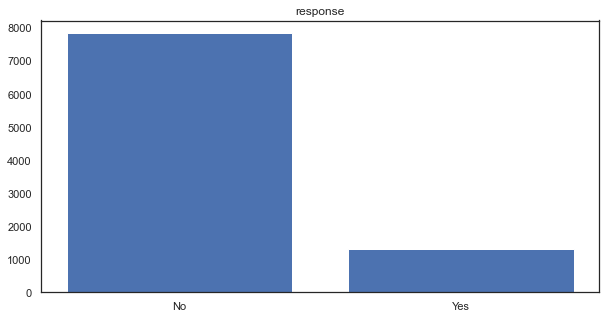

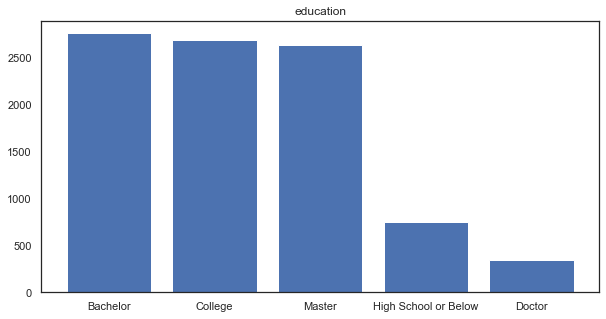

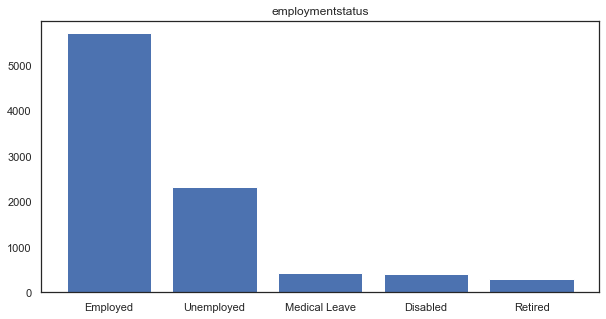

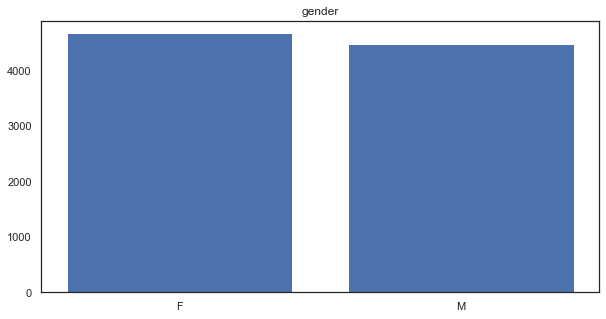

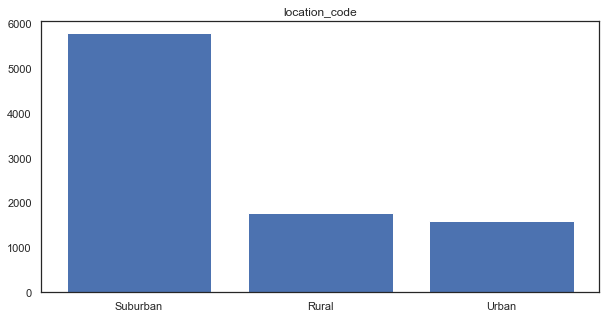

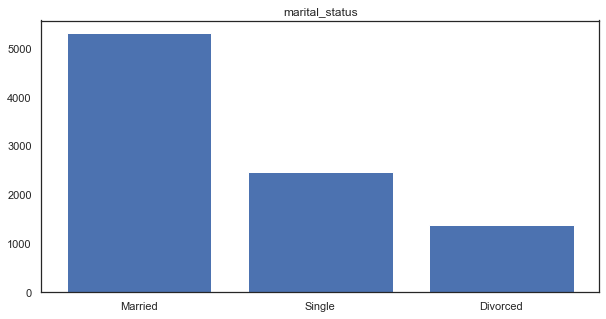

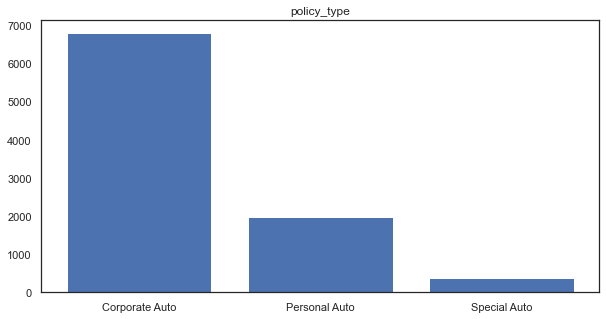

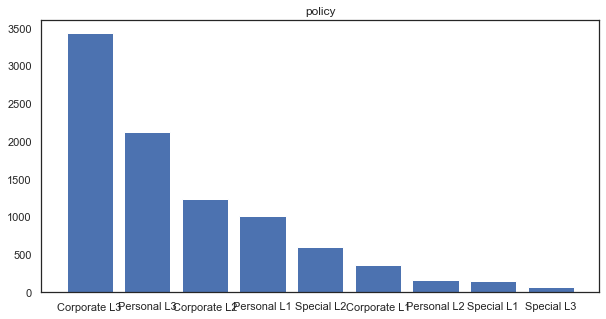

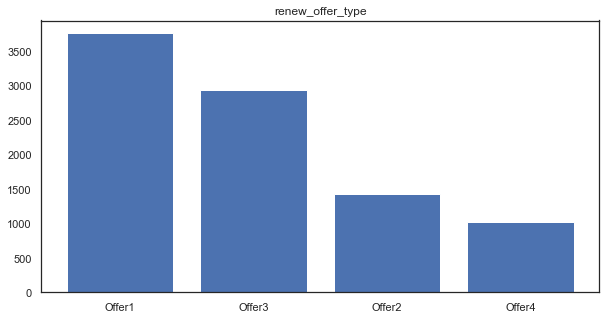

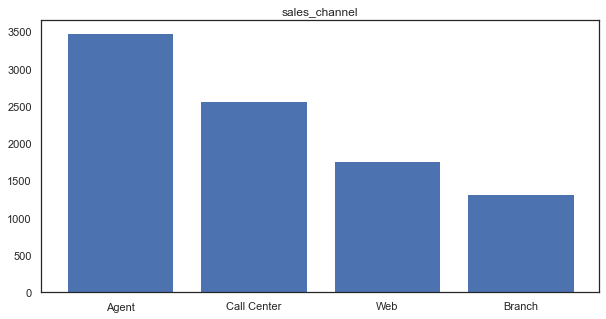

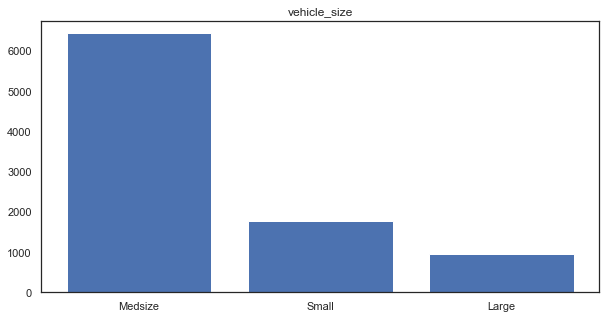

In [124]:
import matplotlib.pyplot as plt                 # visualization library
%matplotlib inline

for c in cat_cols:
    plt.figure(figsize=(10,5))
    plt.bar(data[c].unique(), data[c].value_counts())
    plt.title(c)
    plt.show();

In [125]:
# importamos también la libreria seaborn de visualización

In [126]:
import seaborn as sns                           # visualization library, extends plt
sns.set(style="white")                          # style

**Correlation**

In [127]:
# al tener tantas columnas miramos la correlación para borrar las que tienen, ya que es info parecida
# quitamos la parte de las mask superior ya que es la misma info

C:\Users\ZQ438FV\AppData\Local\Temp\ipykernel_24648\129339137.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(corr, dtype=np.bool))     # generate a mask for the upper triangle


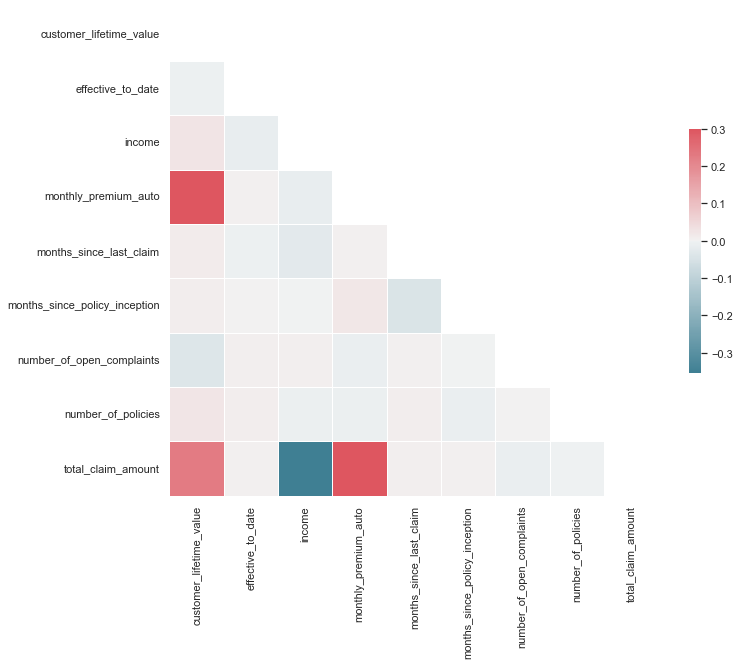

In [128]:
import numpy as np    # numerical python, algebra library


corr=data.corr()      # compute the correlation matrix


mask=np.triu(np.ones_like(corr, dtype=np.bool))     # generate a mask for the upper triangle

f, ax=plt.subplots(figsize=(11, 9))                 # set up the matplotlib figure

cmap=sns.diverging_palette(220, 10, as_cmap=True)   # generate a custom diverging colormap

sns.heatmap(corr, mask=mask, cmap=cmap,             # draw the heatmap with the mask and correct aspect ratio
            vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5});

**All variables**
(be careful, this command may be quite memory hungry)

In [129]:
# poder ver la correlacion entre todas las variables

**Bar plot for each numerical variable.**

In [130]:
# histograma para las variables numericas

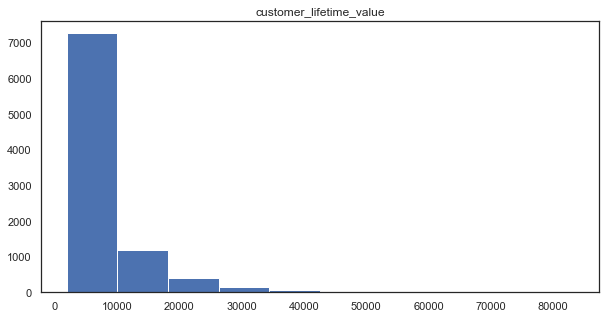

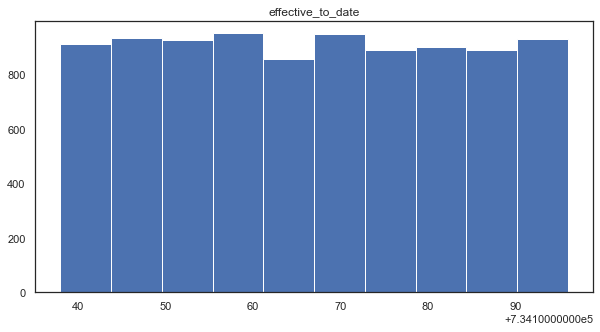

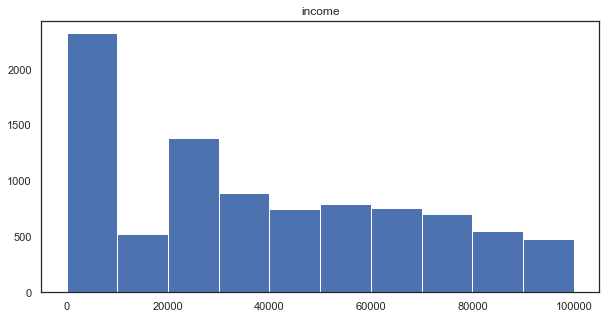

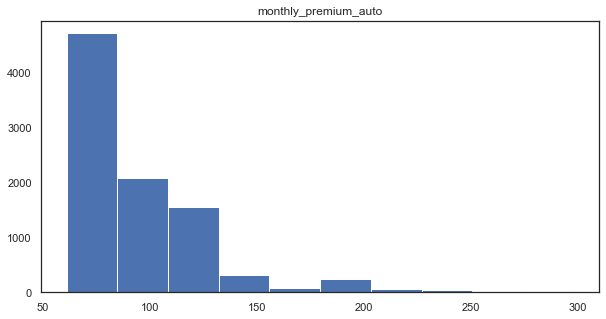

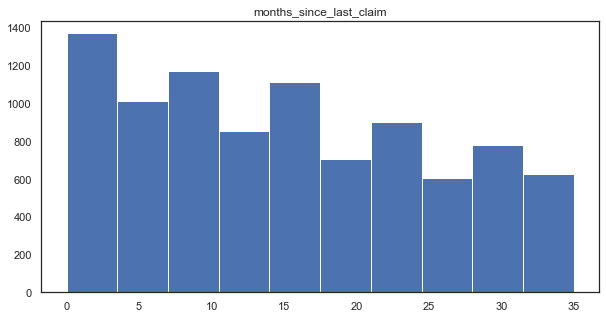

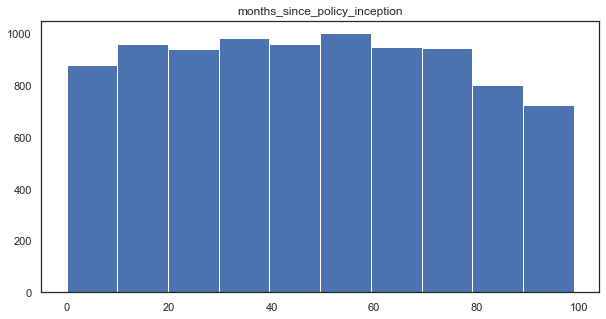

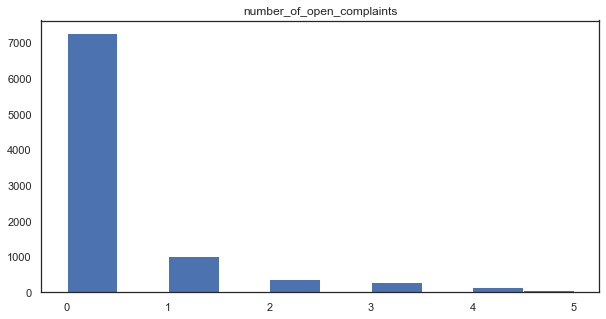

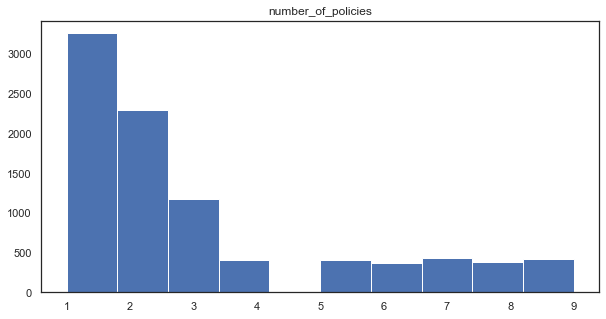

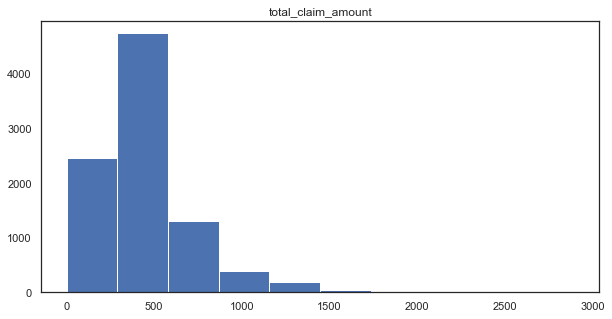

In [131]:
for c in num_cols:
    plt.figure(figsize=(10,5))
    plt.hist(data[c])
    plt.title(c)
    plt.show();

**Box plot for each numerical variable for know outliers of each feature.**

In [132]:
# boxplot para inspeccionar la distribucion y outliers

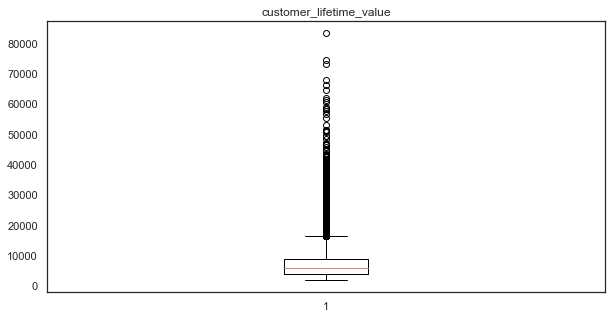

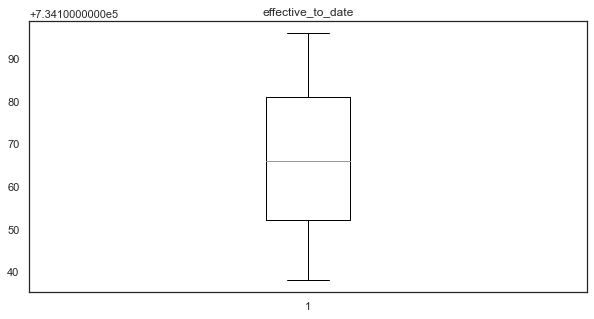

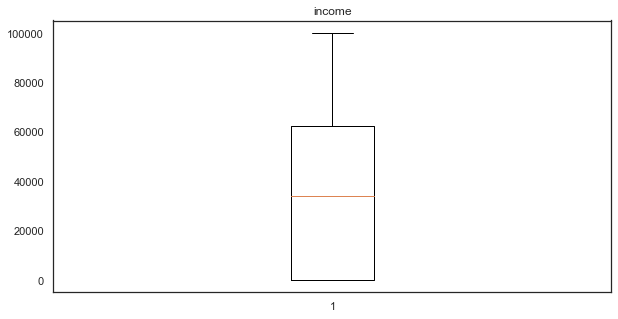

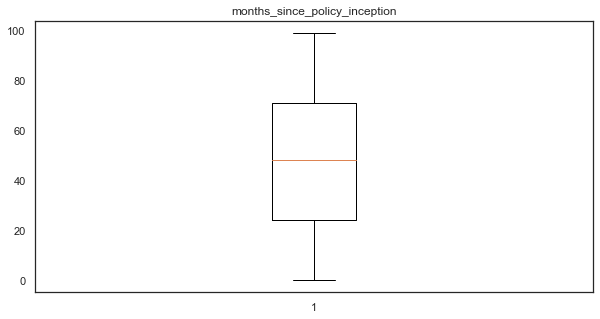

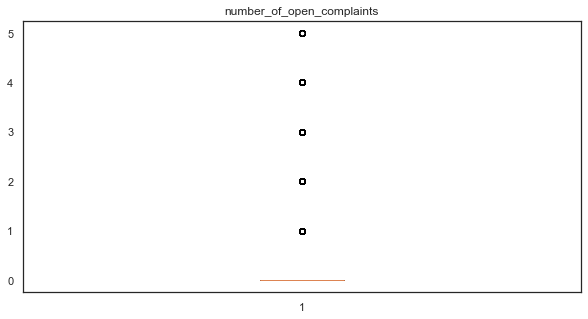

In [133]:
for c in num_cols:
    plt.figure(figsize=(10,5))
    plt.boxplot(data[c])
    plt.title(c)
    plt.show();

**Show a plot of the total number of response.**

In [134]:
# histograma de las respuestas por NO/SI

C:\Users\ZQ438FV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


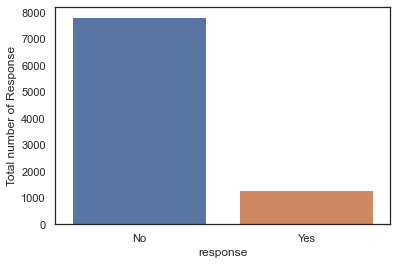

In [135]:
sns.countplot('response', data=data)
plt.ylabel('Total number of Response')
plt.show();

**Show a plot of the response rate by sales channel.**

In [136]:
# histograma de las respuestas NO/SI por tipo de canal de ventas

C:\Users\ZQ438FV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


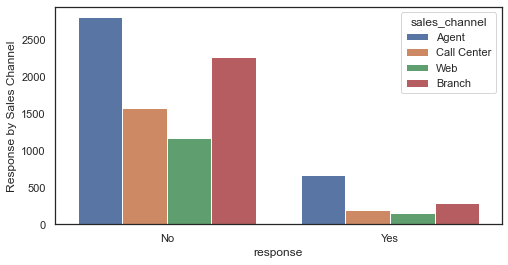

In [137]:
plt.figure(figsize=(8,4))
sns.countplot('response', hue='sales_channel', data=data)
plt.ylabel('Response by Sales Channel')
plt.show();

**Show a plot of the response rate by total claim amount.**

In [138]:
# boxplot de las respuestas NO/SI para ver la distribucion

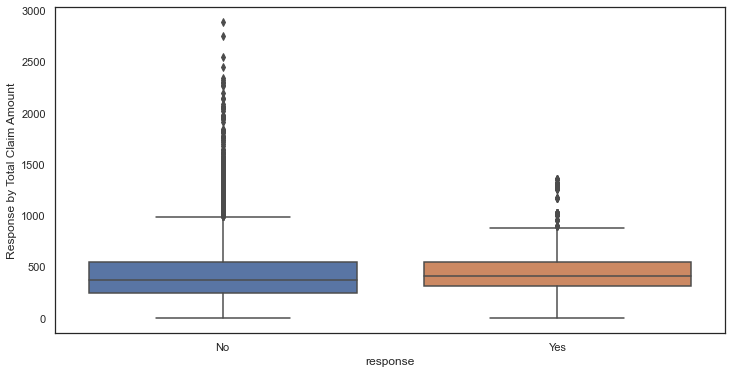

In [139]:
plt.figure(figsize=(12,6))
sns.boxplot(y='total_claim_amount' , x='response', data=data)
plt.ylabel('Response by Total Claim Amount')
plt.show();

**Show a plot of the response rate by income.**

In [140]:
# boxplot para ver el tipo de distribucion en las respuestas en funcion de los ingresos

In [141]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=data)
plt.ylabel('Response by Inncome')
plt.show();

### 04 - Processing Data

- Dealing with outliers

In [142]:
# estamos calculando un upper y lower para poder filtrar y ver los outliers debajo del loewr y encima del upper

In [143]:
# e.g. 3*IQR in a column

q1=np.percentile(data['customer_lifetime_value'], 25)   # percentile 25
q3=np.percentile(data['customer_lifetime_value'], 75)   # percentile 75

iqr=q3-q1  # IQR

upper=q3+3*iqr   # upper boundary
lower=q1-3*iqr   # lower boundary

In [144]:
len(data[data['customer_lifetime_value']<lower])

0

In [145]:
len(data[data['customer_lifetime_value']>upper])

367

**Customer_lifetime_value**

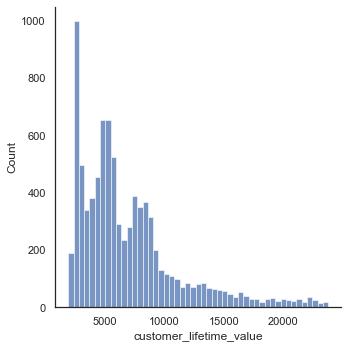

In [146]:
data = data[(data['customer_lifetime_value'] > lower) & (data['customer_lifetime_value'] < upper)]
sns.displot(data['customer_lifetime_value'])
plt.show()

**monthly_premium_auto**

In [147]:
q1=np.percentile(data['monthly_premium_auto'], 25)   # percentile 25
q3=np.percentile(data['monthly_premium_auto'], 75)   # percentile 75

iqr=q3-q1

upper=q3+3*iqr
lower=q1-3*iqr

In [148]:
len(data[data['monthly_premium_auto']<lower])

0

In [149]:
len(data[data['monthly_premium_auto']>upper])

69

In [150]:
data = data[(data['monthly_premium_auto'] > lower) & (data['monthly_premium_auto'] < upper)]
sns.displot(data['monthly_premium_auto'])
plt.show()

**total_claim_amount**

In [151]:
q1=np.percentile(data['total_claim_amount'], 25)   # percentile 25
q3=np.percentile(data['total_claim_amount'], 75)   # percentile 75

iqr=q3-q1

upper=q3+3*iqr
lower=q1-3*iqr

In [152]:
len(data[data['total_claim_amount']<lower])

0

In [153]:
len(data[data['total_claim_amount']>upper])

88

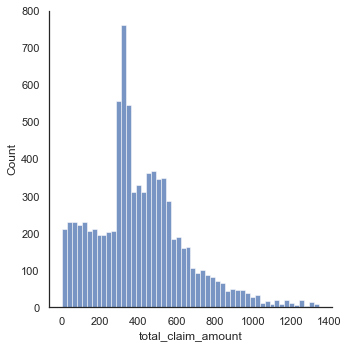

In [154]:
data = data[(data['total_claim_amount'] > lower) & (data['total_claim_amount'] < upper)]
sns.displot(data['total_claim_amount'])
plt.show()

- Normalization

**Min-Max Scaler**

In [155]:
# estamos normalizando los datos con el minmax scaler para que vayan de 0 a 1

In [156]:
from sklearn.preprocessing import MinMaxScaler

data['effective_to_date']=MinMaxScaler().fit_transform(data['effective_to_date'].values.reshape(-1, 1))

data['effective_to_date'].head()

0    0.931034
1    0.517241
2    0.844828
3    0.327586
4    0.568966
Name: effective_to_date, dtype: float64

**Standardize**

In [157]:
# lo normalizamos estos datos pero con el standardscaler para tener datos con media 0 y desv 1

In [158]:
from sklearn.preprocessing import StandardScaler

num_cols

['customer_lifetime_value',
 'effective_to_date',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [159]:
for c in num_cols[:-1]:   # we'll normalize all less the target column
    data[c]=StandardScaler().fit_transform(data[c].values.reshape(-1, 1))

In [160]:
data.head()

state  customer_lifetime_value response  coverage education  \
0  Washington                -0.958591       No     Basic  Bachelor   
1     Arizona                 0.027107       No  Extended  Bachelor   
2      Nevada                 1.408363       No   Premium  Bachelor   
3  California                 0.182893       No     Basic  Bachelor   
4  Washington                -0.946860       No     Basic  Bachelor   

   effective_to_date employmentstatus gender    income location_code  \
0           1.481797         Employed      F  0.602085      Suburban   
1           0.066806       Unemployed      F -1.247105      Suburban   
2           1.187008         Employed      F  0.355401      Suburban   
3          -0.581731       Unemployed      M -1.247105      Suburban   
4           0.243680         Employed      M  0.193366         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married             -0.733514                 1.682624   
1         Single              0.153489                -0.207682   
2        Married              0.650210                 0.289767   
3        Married              0.579250                 0.289767   
4         Single             -0.591593                -0.307171   

   months_since_policy_inception  number_of_open_complaints  \
0                      -1.537899                  -0.423108   
1                      -0.211685                  -0.423108   
2                      -0.355060                  -0.423108   
3                       0.612718                  -0.423108   
4                      -0.139998                  -0.423108   

   number_of_policies     policy_type        policy renew_offer_type  \
0           -0.825166  Corporate Auto  Corporate L3           Offer1   
1            2.061071   Personal Auto   Personal L3           Offer3   
2           -0.412846   Personal Auto   Personal L3           Offer1   
3            1.648751  Corporate Auto  Corporate L2           Offer1   
4           -0.825166   Personal Auto   Personal L1           Offer1   

  sales_channel  total_claim_amount vehicle_size  
0         Agent          384.811147      Medsize  
1         Agent         1131.464935      Medsize  
2         Agent          566.472247      Medsize  
3   Call Center          529.881344      Medsize  
4         Agent          138.130879      Medsize

- **Encoding Categorical Data**

In [161]:
# ahora vamos a tratar las categoricas para codificarlas

In [162]:
one_hot_data=pd.get_dummies(data[cat_cols], drop_first=True)   # one hot encoding categorical variables

one_hot_data.head()

state_California  state_Nevada  state_Oregon  state_Washington  \
0                 0             0             0                 1   
1                 0             0             0                 0   
2                 0             1             0                 0   
3                 1             0             0                 0   
4                 0             0             0                 1   

   response_Yes  coverage_Extended  coverage_Premium  education_College  \
0             0                  0                 0                  0   
1             0                  1                 0                  0   
2             0                  0                 1                  0   
3             0                  0                 0                  0   
4             0                  0                 0                  0   

   education_Doctor  education_High School or Below  education_Master  \
0                 0                               0                 0   
1                 0                               0                 0   
2                 0                               0                 0   
3                 0                               0                 0   
4                 0                               0                 0   

   employmentstatus_Employed  employmentstatus_Medical Leave  \
0                          1                               0   
1                          0                               0   
2                          1                               0   
3                          0                               0   
4                          1                               0   

   employmentstatus_Retired  employmentstatus_Unemployed  gender_M  \
0                         0                            0         0   
1                         0                            1         0   
2                         0                            0         0   
3                         0                            1         1   
4                         0                            0         1   

   location_code_Suburban  location_code_Urban  marital_status_Married  \
0                       1                    0                       1   
1                       1                    0                       0   
2                       1                    0                       1   
3                       1                    0                       1   
4                       0                    0                       0   

   marital_status_Single  policy_type_Personal Auto  policy_type_Special Auto  \
0                      0                          0                         0   
1                      1                          1                         0   
2                      0                          1                         0   
3                      0                          0                         0   
4                      1                          1                         0   

   policy_Corporate L2  policy_Corporate L3  policy_Personal L1  \
0                    0                    1                   0   
1                    0                    0                   0   
2                    0                    0                   0   
3                    1                    0                   0   
4                    0                    0                   1   

   policy_Personal L2  policy_Personal L3  policy_Special L1  \
0                   0                   0                  0   
1                   0                   1                  0   
2                   0                   1                  0   
3                   0                   0                  0   
4                   0                   0                  0   

   policy_Special L2  policy_Special L3  renew_offer_type_Offer2  \
0                  0                  0                        0   
1                  0                

**Concat numerical and categorical DataFrames**

In [163]:
# concatenamos todo el dataset (nums y cats) para juntarlo

In [164]:
data=pd.concat([data, one_hot_data], axis=1)   # concat dataframes
data.drop(columns=cat_cols, inplace=True)
data.head()

customer_lifetime_value  effective_to_date    income  monthly_premium_auto  \
0                -0.958591           1.481797  0.602085             -0.733514   
1                 0.027107           0.066806 -1.247105              0.153489   
2                 1.408363           1.187008  0.355401              0.650210   
3                 0.182893          -0.581731 -1.247105              0.579250   
4                -0.946860           0.243680  0.193366             -0.591593   

   months_since_last_claim  months_since_policy_inception  \
0                 1.682624                      -1.537899   
1                -0.207682                      -0.211685   
2                 0.289767                      -0.355060   
3                 0.289767                       0.612718   
4                -0.307171                      -0.139998   

   number_of_open_complaints  number_of_policies  total_claim_amount  \
0                  -0.423108           -0.825166          384.811147   
1                  -0.423108            2.061071         1131.464935   
2                  -0.423108           -0.412846          566.472247   
3                  -0.423108            1.648751          529.881344   
4                  -0.423108           -0.825166          138.130879   

   state_California  state_Nevada  state_Oregon  state_Washington  \
0                 0             0             0                 1   
1                 0             0             0                 0   
2                 0             1             0                 0   
3                 1             0             0                 0   
4                 0             0             0                 1   

   response_Yes  coverage_Extended  coverage_Premium  education_College  \
0             0                  0                 0                  0   
1             0                  1                 0                  0   
2             0                  0                 1                  0   
3             0                  0                 0                  0   
4             0                  0                 0                  0   

   education_Doctor  education_High School or Below  education_Master  \
0                 0                               0                 0   
1                 0                               0                 0   
2                 0                               0                 0   
3                 0                               0                 0   
4                 0                               0                 0   

   employmentstatus_Employed  employmentstatus_Medical Leave  \
0                          1                               0   
1                          0                               0   
2                          1                               0   
3                          0                               0   
4                          1                               0   

   employmentstatus_Retired  employmentstatus_Unemployed  gender_M  \
0                         0                            0         0   
1                         0                            1         0   
2                         0                            0         0   
3                         0                            1         1   
4                         0                            0         1   

   location_code_Suburban  location_code_Urban  marital_status_Married  \
0                       1                    0                       1   
1                       1                    0                       0   
2                       1                    0                       1   
3                       1                    0                       1   
4                       0                    0                       0   

   marital_status_Single  policy_type_Personal Auto  policy_type_Special Auto  \
0                      0                          0                         0  

- Splitting into train set and test set

In [165]:
# vamos a entrenar el modelo con variable x (todas menos la que queremos predecir) e y (total claim amount)

In [166]:
# first, split X-y (learning-target data)
X=data.drop(columns=['total_claim_amount'])
y=data['total_claim_amount']

# checking shape
print(X.shape)
print(y.shape)

(8609, 46)
(8609,)


In [167]:
# ahora dividiremos el dataset para tener el conjunto de test (20%) y entreno (80%)

In [168]:
# train_test_split
from sklearn.model_selection import train_test_split as tts

In [169]:
# train-test-split (4 sets)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)  # random state fixed sample

### 05 - Modeling

We have now the data prepared for the modeling phase.
https://s3.amazonaws.com/assets.datacamp.com/email/other/ML+Cheat+Sheet_2.pdf


Linear regression is a linear model, which means it works really nicely when the data has a linear shape. But, when the data has a non-linear shape, then a linear model cannot capture the non-linear features.

So in this case, you can use the tree-based methods, which do a better job at capturing the non-linearity in the data by dividing the space into smaller sub-spaces depending on the questions asked.

In [170]:
# ahora vamos a hacer distintos modelos para ver cual es el que mejor describe el dataset

**Linear Regression**

In [171]:
# importamos la libreria, abrimos el modelo, entrenamos el modelo y predecimos sobre el conjunto de test 

In [172]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)   # model prediction

**Regularization**

In [173]:
#vamos a hacer lo mismo con los otros tipos de modelo

In [174]:
from sklearn.linear_model import Lasso       # L1
from sklearn.linear_model import Ridge       # L2
from sklearn.linear_model import ElasticNet  # L1+L2

In [175]:
# Lasso L1

lasso=Lasso()
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

In [176]:
# Ridge L2

ridge=Ridge()
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [177]:
# ElasticNet L1+L2

elastic=ElasticNet()
elastic.fit(X_train, y_train)

y_pred_elastic = elastic.predict(X_test)

**Random Forest Regressor**

In [178]:
from sklearn.ensemble import RandomForestRegressor as RFR

rfr=RFR()
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

**XGBoost**

In [179]:
# conda install -c conda-forge xgboost

In [180]:
from xgboost import XGBRegressor as XGBR

xgbr=XGBR()
xgbr.fit(X_train, y_train)

y_pred_xgbr = xgbr.predict(X_test)

C:\Users\ZQ438FV\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\ZQ438FV\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


**LightGBM**

In [181]:
# conda install -c conda-forge lightgbm

In [182]:
from lightgbm import LGBMRegressor as LGBMR

lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)

y_pred_lgbmr = lgbmr.predict(X_test)

### 06 - Model Validation

In [183]:
models=[linreg, lasso, ridge, elastic, rfr, xgbr, lgbmr]
model_names=['linreg', 'lasso', 'ridge', 'elastic', 'rfr', 'xgbr', 'lgbmr']
preds=[y_pred_linreg, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr, y_pred_xgbr, y_pred_lgbmr]

In [184]:
# vamos a hacer un for para todos los modelos (train y test) y para todas las metricas para ver donde tenemos los mejores resultados

- R2.

In [185]:
for i in range(len(models)):

    train_score=models[i].score(X_train, y_train) #R2
    test_score=models[i].score(X_test, y_test)

    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

Model: linreg, train R2: 0.7646885215791135 -- test R2: 0.7804131606026915
Model: lasso, train R2: 0.7618609586637215 -- test R2: 0.7817285605459721
Model: ridge, train R2: 0.7646873936473013 -- test R2: 0.7805083194216844
Model: elastic, train R2: 0.5304746317283011 -- test R2: 0.5612962112379651
Model: rfr, train R2: 0.9771443584192159 -- test R2: 0.8384908743391746
Model: xgbr, train R2: 0.961394910814655 -- test R2: 0.8191744010933326
Model: lgbmr, train R2: 0.9064636155647674 -- test R2: 0.8374882112809806


- MSE.

In [186]:
from sklearn.metrics import mean_squared_error as mse

for i in range(len(models)):

    train_mse=mse(models[i].predict(X_train), y_train) #MSE
    test_mse=mse(preds[i], y_test)

    print ('Model: {}, train MSE: {} -- test MSE: {}'.format(model_names[i], train_mse, test_mse))

Model: linreg, train MSE: 13871.080213108113 -- test MSE: 11724.978676175153
Model: lasso, train MSE: 14037.758661053862 -- test MSE: 11654.742061230756
Model: ridge, train MSE: 13871.146702141059 -- test MSE: 11719.897610631318
Model: elastic, train MSE: 27677.460058862034 -- test MSE: 23424.867275789737
Model: rfr, train MSE: 1347.2884528057352 -- test MSE: 8623.882285379272
Model: xgbr, train MSE: 2275.6828197148475 -- test MSE: 9655.297635807512
Model: lgbmr, train MSE: 5513.7586149731405 -- test MSE: 8677.42011582931


- **RMSE.**

In [187]:
for i in range(len(models)):

    train_rmse=mse(models[i].predict(X_train), y_train)**0.5 #RMSE
    test_rmse=mse(preds[i], y_test)**0.5

    print ('Model: {}, train RMSE: {} -- test RMSE: {}'.format(model_names[i], train_rmse, test_rmse))

Model: linreg, train RMSE: 117.77555014988515 -- test RMSE: 108.28194067421933
Model: lasso, train RMSE: 118.4810476871886 -- test RMSE: 107.95713066412407
Model: ridge, train RMSE: 117.77583241964821 -- test RMSE: 108.25847592974566
Model: elastic, train RMSE: 166.36544129975442 -- test RMSE: 153.05184505843025
Model: rfr, train RMSE: 36.70542811091754 -- test RMSE: 92.86486033683178
Model: xgbr, train RMSE: 47.704117429367116 -- test RMSE: 98.26137407856412
Model: lgbmr, train RMSE: 74.25468749495307 -- test RMSE: 93.15267100748808


- MAE.

In [188]:
from sklearn.metrics import mean_absolute_error as mae
for i in range(len(models)):
    train_mae=mae(models[i].predict(X_train), y_train) #MAE
    test_mae=mae(preds[i], y_test)

    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

Model: linreg, train MAE: 85.60692808832138 -- test MAE: 80.69319506256495
Model: lasso, train MAE: 85.55560048603445 -- test MAE: 80.44461297713295
Model: ridge, train MAE: 85.57779493548435 -- test MAE: 80.65088334698773
Model: elastic, train MAE: 120.52792591770988 -- test MAE: 111.30995546347903
Model: rfr, train MAE: 24.691648465790614 -- test MAE: 63.3281361608014
Model: xgbr, train MAE: 32.68443297718968 -- test MAE: 67.73248257406323
Model: lgbmr, train MAE: 53.48739053182266 -- test MAE: 65.73404805823421


### Can you try to improve the model ?

I.e. you can try by removing columns that you feel are not predictive. Or making transformations to some columns to make them closer to a normal distribution, or..

    - Choosing a different way to fill null values
    - Working with a categorical variable to reduce the number of categories
    - Different data transformation
    - A different method to remove outliers
    - Choosing different scaling method

<font color='magenta'>
Your code goes here:
    
</font>

In [189]:
# con los 3 outliers eliminados hemos mejorado el modelo

### 07 - Reporting

- Present results.

**Data Level**

- Drop Nan values because they are, in fact, duplicates.
- Do not drop outliers because they are just a few.

**Problem Level**

- Total claim amount has a great variance.
- We can predict the total claim amount with a 25% of error, even when R2 is high.
- We need to determinate which are the significative variables.

### Additional Resources

- [Best practices for PowerPoint presentations](https://alum.mit.edu/best-practices-powerpoint-presentations)
- [More tips on PowerPoint formatting](https://www.workfront.com/blog/10-tips-for-designing-presentations-that-dont-suck-part-1)